# Starbucks Capstone Project solution for ML Engineer Nanodegree

## Data Processing

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
# Read the data
portfolio_df = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile_df = pd.read_json('data/profile.json', orient='records', lines=True)
transcript_df = pd.read_json('data/transcript.json', orient='records', lines=True)

### Data Exploration

#### Portfolio DataFrame

In [7]:
# Descripe the Portfolio dataframe
print('The shape of Portfolio dataframe is {}'.format(portfolio_df.shape))

The shape of Portfolio dataframe is (10, 6)


This dataframe contains the information about different offers with details about each of them

In [8]:
# Show the Portfolio dataframe
display(portfolio_df)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


#### Profile DataFrame

In [9]:
# Descripe the Profile dataframe
print('The shape of Profile dataframe is {}'.format(profile_df.shape))

The shape of Profile dataframe is (17000, 5)


This dataframe contains the information about different customers with their demographic data

In [10]:
# Show the Profile dataframe
display(profile_df)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


We see the missing values in gender and income, so there is a reason to process this dataframe. In addition, it is useful to convert the string dates into datetime values.

In [11]:
# There are no duplicated customers in dataframe
set(profile_df.duplicated(subset=['id']))

{False}

In [12]:
# We see that NaN values for Income and Gender intersects, so we can drop them
display(profile_df.loc[profile_df['income'].isnull()].describe())
display(profile_df.loc[profile_df['gender'].isnull()].describe())

,age,became_member_on,income
count,2175.0,2.175000e+03,0.0
mean,118.0,2.016804e+07,NaN
std,0.0,1.009105e+04,NaN
min,118.0,2.013080e+07,NaN
25%,118.0,2.016070e+07,NaN
50%,118.0,2.017073e+07,NaN
75%,118.0,2.017123e+07,NaN
max,118.0,2.018073e+07,NaN


,age,became_member_on,income
count,2175.0,2.175000e+03,0.0
mean,118.0,2.016804e+07,NaN
std,0.0,1.009105e+04,NaN
min,118.0,2.013080e+07,NaN
25%,118.0,2.016070e+07,NaN
50%,118.0,2.017073e+07,NaN
75%,118.0,2.017123e+07,NaN
max,118.0,2.018073e+07,NaN


In [13]:
profile_df = profile_df.loc[~profile_df['income'].isnull()]

print('After that, the shape of Profile dataframe is {}'.format(profile_df.shape))

display(profile_df)

After that, the shape of Profile dataframe is (14825, 5)


,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [14]:
# Let's change string date to datetime
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'].astype(str)).dt.date

In [15]:
# # We see that the Other gender is not so frequent in the data
# pd.DataFrame(profile_df.groupby('gender').describe()['age']['count'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


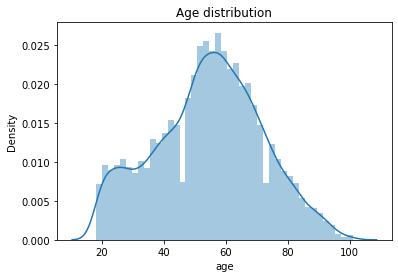

In [16]:
# We can see the age distribution looks bell-shaped
sns.distplot(profile_df['age'])
plt.title('Age distribution')
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


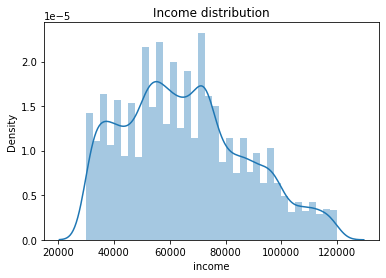

In [17]:
# While income distribution is not bell-shaped
sns.distplot(profile_df['income'])
plt.title('Income distribution')
plt.show()

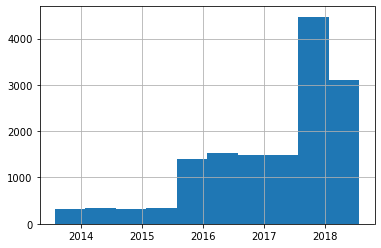

In [18]:
# The major share of the customers arrived after the 2017
profile_df['became_member_on'].hist()
plt.show()

#### Transcript DataFrame

This dataframe contains the information about different transactions with details.

In [19]:
# Descripe the Transcript dataframe
print('The shape of Transcript dataframe is {}'.format(transcript_df.shape))

The shape of Transcript dataframe is (306534, 4)


In [20]:
# Show the Transcript dataframe
display(transcript_df)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [21]:
# Here is the descriptive statistics about the each event count
pd.DataFrame(transcript_df.groupby('event').describe()['time']['count'])

,count
event,
offer completed,33579.0
offer received,76277.0
offer viewed,57725.0
transaction,138953.0


In [22]:
# Let's delve more into the Value feature 
# and check the cross-intersection between the event and value
values_parsed = transcript_df['value'].apply(lambda x: str(list(x.keys())))

pd.crosstab(values_parsed, transcript_df['event'])

event,offer completed,offer received,offer viewed,transaction
value,,,,
['amount'],0,0,0,138953
['offer id'],0,76277,57725,0
"['offer_id', 'reward']",33579,0,0,0


In [23]:
# We can parse these values and replace value feature with the more 
# detailed ones

transcript_df['offer_id'] = transcript_df['value'].apply(lambda x: \
                             x['offer_id'] if 'offer_id' in x \
                             else (x['offer id'] if 'offer id' \
                               in x else None))

for key in ['amount', 'reward']:
    transcript_df[key] = transcript_df['value'].apply(lambda x: \
                          x[key] if key in x else None)

In [24]:
# Therefore, we can drop the old feature
transcript_df = transcript_df.drop('value', axis=1)

In [25]:
# Let's analyze the behavior of the particular client and check
# the maximum number of purchases for specific customer

purchases_per_client = transcript_df.groupby('person')['time'].count().sort_values(ascending=False)

In [26]:
# Here is Top-5
purchases_per_client.head(5)

person
94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
d0a80415b84c4df4908b8403b19765e3    48
5e60c6aa3b834e44b822ea43a3efea26    48
Name: time, dtype: int64

In [27]:
# Let's check the first client
transcript_df.loc[transcript_df['person'] == \
                  purchases_per_client.index[0]].sort_values('time')

,person,event,time,offer_id,amount,reward
2276,94de646f7b6041228ca7dec82adb97d2,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN
16010,94de646f7b6041228ca7dec82adb97d2,offer viewed,6,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN
24531,94de646f7b6041228ca7dec82adb97d2,transaction,30,None,7.41,NaN
24532,94de646f7b6041228ca7dec82adb97d2,offer completed,30,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0
42252,94de646f7b6041228ca7dec82adb97d2,transaction,102,None,1.47,NaN
55475,94de646f7b6041228ca7dec82adb97d2,offer received,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
75256,94de646f7b6041228ca7dec82adb97d2,offer viewed,186,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
77624,94de646f7b6041228ca7dec82adb97d2,transaction,192,None,2.62,NaN
81725,94de646f7b6041228ca7dec82adb97d2,transaction,204,None,0.59,NaN
93913,94de646f7b6041228ca7dec82adb97d2,transaction,246,None,2.28,NaN


We see that there is connection between transaction and offer completed, displayed with the same time. Let's check whether this is true

In [28]:
print('There are {} matches'.format(\
        len(pd.merge(transcript_df.loc[transcript_df['event'] == \
                                                 'offer completed'],
        transcript_df.loc[transcript_df['event'] == 'transaction'],
        on=['person', 'time']))))

There are 33579 matches


In [29]:
# Let's also check the connection between offer received and offer viewed
print('There are {} matches'.format(\
        len(pd.merge(transcript_df.loc[transcript_df['event'] == \
                                                 'offer received'],
        transcript_df.loc[transcript_df['event'] == 'offer viewed'],
        on=['person', 'offer_id']))))

There are 79329 matches


#### Customer's Journey

In order to analyze the conversion, we have to recreate the customer's journey using the data. We have to:
- Analyze the data about the offer view
- Check the conversion into the purchase
- Analyze the data about the transaction

In [30]:
# Merge the offer receives and offer views
offer_view_df = pd.merge(\
         transcript_df.loc[transcript_df['event'] == 'offer received', \
                           ['person', 'offer_id', 'time']],
         transcript_df.loc[transcript_df['event'] == 'offer viewed', \
                           ['person', 'offer_id', 'time']],
         on=['person', 'offer_id'], how='left', \
         suffixes=['_received', '_viewed'])

In [31]:
# Remove the broken data: view have to be later than receive and remove null values
offer_view_df = offer_view_df.loc[(offer_view_df['time_viewed'] >= \
                                   offer_view_df['time_received']) | \
                                  ~(offer_view_df['time_viewed'].isnull())]

In [32]:
# Take the nearest receive before the view
offer_view_df = pd.concat((offer_view_df.groupby(['person', 'offer_id', 
          'time_viewed']).agg({'time_received': 'max'}).reset_index(),
          offer_view_df.loc[offer_view_df['time_viewed'].isnull()]))

In [33]:
offer_view_df.head()

,person,offer_id,time_viewed,time_received
0,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,372.0,336
1,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,192.0,168
2,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,456.0,408
3,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,540.0,504
4,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,216.0,576


Let's apply the same reasoning to the offer completion

In [34]:
# Merge the DataFrames
offer_complete_df = pd.merge(offer_view_df, 
         transcript_df.loc[transcript_df['event'] == 'offer completed', \
                           ['person', 'offer_id', 'time', 'reward']],
         on=['person', 'offer_id'], how='left')

# Rename the column
offer_complete_df.rename(columns={'time': 'time_completed'}, inplace=True)

In [35]:
# We ensure that completion is before the view 
offer_complete_df.loc[(offer_complete_df['time_viewed'].isnull()) | \
                      (offer_complete_df['time_viewed'] > \
                       offer_complete_df['time_completed']), \
                      ['reward', 'time_completed']] = (np.nan, np.nan)

offer_complete_df.drop_duplicates = offer_complete_df.drop_duplicates()

In [36]:
# Concatenate the nearest completion to the view and receive
offer_complete_df = pd.concat(
    (offer_complete_df.groupby(['person', 'offer_id', 
    'time_completed', 'reward']).agg({'time_viewed': 'max', 
                                  'time_received': 'max'}).reset_index(),
     offer_complete_df.loc[offer_complete_df['time_completed'].isnull()]))

In [37]:
offer_complete_df.head()

,person,offer_id,time_completed,reward,time_viewed,time_received
0,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,576.0,5.0,432.0,408
1,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,252.0,3.0,186.0,168
2,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,576.0,5.0,516.0,504
3,0020c2b971eb4e9188eac86d93036a77,4d5c57ea9a6940dd891ad53e9dbe8da0,510.0,10.0,426.0,408
4,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,54.0,2.0,12.0,336


Now let's add the information about the transactions

In [38]:
# Merge the DataFrames
offer_transaction_df = pd.merge(offer_complete_df, 
         transcript_df.loc[transcript_df['event'] == 'transaction', \
                           ['person', 'time', 'amount']],
         left_on=['person', 'time_completed'], 
        right_on=['person', 'time'], how='outer')

In [39]:
# Rename the column
offer_transaction_df.rename(columns={'time': 'time_transaction'}, inplace=True)

In [40]:
# Add a column with time equal to received offer, 
# and transaction time otherwise
offer_transaction_df['time'] = offer_transaction_df['time_received']

In [41]:
offer_transaction_df.loc[offer_transaction_df['time'].isnull(), 
                         'time'] = offer_transaction_df['time_transaction']

In [42]:
# Drop the duplicates
offer_transaction_df.sort_values(['person', 'offer_id', 'time', 
                                  'time_completed'], inplace=True)
offer_transaction_df = offer_transaction_df.drop_duplicates(['person', 
                         'offer_id', 'time'])

In [43]:
print("The final data size is ", offer_transaction_df.shape)

The final data size is  (164558, 9)


Let's finally merge all the data into the single DataFrame.

In [44]:
# Add offer type information
offer_type_df = pd.merge(offer_transaction_df, 
         portfolio_df.rename(columns={'id': 'offer_id', 
                                   'reward': 'portfolio_reward'}),
        on='offer_id', how='left')

In [45]:
offer_type_df.head()

,person,offer_id,time_completed,reward,time_viewed,time_received,time_transaction,amount,time,portfolio_reward,channels,difficulty,duration,offer_type
0,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,NaN,NaN,372.0,336.0,NaN,NaN,336.0,0.0,"[web, email, mobile]",0.0,4.0,informational
1,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,192.0,168.0,NaN,NaN,168.0,0.0,"[email, mobile, social]",0.0,3.0,informational
2,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,456.0,408.0,NaN,NaN,408.0,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
3,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,540.0,504.0,NaN,NaN,504.0,2.0,"[web, email, mobile, social]",10.0,10.0,discount
4,0009655768c64bdeb2e877511632db8f,NaN,NaN,NaN,NaN,NaN,228.0,22.16,228.0,NaN,NaN,NaN,NaN,NaN


In [46]:
# Add demographic information
offer_all_df = pd.merge(offer_type_df,
                       profile_df.rename(columns={'id': 'person'}),
                       how='inner', on='person')

In [47]:
offer_all_df.head()

,person,offer_id,time_completed,reward,time_viewed,time_received,time_transaction,amount,time,portfolio_reward,channels,difficulty,duration,offer_type,gender,age,became_member_on,income
0,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,NaN,NaN,372.0,336.0,NaN,NaN,336.0,0.0,"[web, email, mobile]",0.0,4.0,informational,M,33,2017-04-21,72000.0
1,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,192.0,168.0,NaN,NaN,168.0,0.0,"[email, mobile, social]",0.0,3.0,informational,M,33,2017-04-21,72000.0
2,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,456.0,408.0,NaN,NaN,408.0,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,M,33,2017-04-21,72000.0
3,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,540.0,504.0,NaN,NaN,504.0,2.0,"[web, email, mobile, social]",10.0,10.0,discount,M,33,2017-04-21,72000.0
4,0009655768c64bdeb2e877511632db8f,NaN,NaN,NaN,NaN,NaN,228.0,22.16,228.0,NaN,NaN,NaN,NaN,NaN,M,33,2017-04-21,72000.0


In [48]:
# Sort the data
offer_all_df.sort_values(['person', 'time', 'offer_id'], inplace=True)

In [49]:
# Let's fill the values for transactions' offer type 
offer_all_df['offer_type'].fillna('transaction', inplace=True)

offer_all_df.head()

,person,offer_id,time_completed,reward,time_viewed,time_received,time_transaction,amount,time,portfolio_reward,channels,difficulty,duration,offer_type,gender,age,became_member_on,income
1,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,192.0,168.0,NaN,NaN,168.0,0.0,"[email, mobile, social]",0.0,3.0,informational,M,33,2017-04-21,72000.0
4,0009655768c64bdeb2e877511632db8f,NaN,NaN,NaN,NaN,NaN,228.0,22.16,228.0,NaN,NaN,NaN,NaN,transaction,M,33,2017-04-21,72000.0
0,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,NaN,NaN,372.0,336.0,NaN,NaN,336.0,0.0,"[web, email, mobile]",0.0,4.0,informational,M,33,2017-04-21,72000.0
2,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,456.0,408.0,NaN,NaN,408.0,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,M,33,2017-04-21,72000.0
5,0009655768c64bdeb2e877511632db8f,NaN,NaN,NaN,NaN,NaN,414.0,8.57,414.0,NaN,NaN,NaN,NaN,transaction,M,33,2017-04-21,72000.0


In [50]:
print('The final shape of the data is ', offer_all_df.shape)

The final shape of the data is  (143843, 18)


In [51]:
# Save the data
offer_all_df.to_csv('./data/customer_journey.csv', index=False)

### New Features Creation

In [52]:
# Let's test that the file we saved is loading correctly
customer_journey_df = pd.read_csv('./data/customer_journey.csv',
                                  parse_dates=['became_member_on'])

In [53]:
# Let's drop the data when the offer was never viewed
customer_journey_df = customer_journey_df.loc[\
              (customer_journey_df['offer_type'] == 'transaction') \
            |(customer_journey_df['time_viewed'].isnull() == False)]

In [54]:
# Keep the time variable equal to time viewed, transaction time otherwise
customer_journey_df['time'] = customer_journey_df['time_viewed']
customer_journey_df.loc[customer_journey_df['offer_type'] == \
            'transaction', 'time'] = customer_journey_df['time_transaction']

In [55]:
print('The current shape of data is {}'.format(customer_journey_df.shape))

The current shape of data is (143843, 18)


In [56]:
customer_journey_df.head()

,person,offer_id,time_completed,reward,time_viewed,time_received,time_transaction,amount,time,portfolio_reward,channels,difficulty,duration,offer_type,gender,age,became_member_on,income
0,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,192.0,168.0,NaN,NaN,192.0,0.0,"['email', 'mobile', 'social']",0.0,3.0,informational,M,33,2017-04-21,72000.0
1,0009655768c64bdeb2e877511632db8f,NaN,NaN,NaN,NaN,NaN,228.0,22.16,228.0,NaN,NaN,NaN,NaN,transaction,M,33,2017-04-21,72000.0
2,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,NaN,NaN,372.0,336.0,NaN,NaN,372.0,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational,M,33,2017-04-21,72000.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,456.0,408.0,NaN,NaN,456.0,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,M,33,2017-04-21,72000.0
4,0009655768c64bdeb2e877511632db8f,NaN,NaN,NaN,NaN,NaN,414.0,8.57,414.0,NaN,NaN,NaN,NaN,transaction,M,33,2017-04-21,72000.0


We set as the aim to maximize the conversion rate for each offer type.
In order to evaluate the model, we have to calculate the benchmark based on the historical data.

In [57]:
# Keep only relevant features
conversion_df = customer_journey_df.loc[:, ['offer_type',
                                           'time_viewed', 'time_completed']]

# Mark the offers viewed if they are non-informational and viewed
conversion_df['viewed'] = 0
conversion_df.loc[(conversion_df['offer_type'].isin(['bogo', 'discount'])) & \
                  (conversion_df['time_viewed'].isnull() == False), 
                  'viewed'] = 1

In [58]:
# Mark conversion
conversion_df['conversion'] = 0
conversion_df.loc[(conversion_df['viewed'] == 1.0) & \
                  (conversion_df['time_completed'].isnull() == False), 
                  'conversion'] = 1

In [59]:
viewed_num = np.sum(conversion_df['viewed'])
conversion_num = np.sum(conversion_df['conversion'])

print('{} users viewed the offer and {} completed it'.format(
    viewed_num, conversion_num))
print('Therefore, the conversion is {} %'.format(\
                                 round(conversion_num/viewed_num*100, 2)))

34451 users viewed the offer and 20453 completed it
Therefore, the conversion is 59.37 %


In [60]:
# We can also divide it by the offer type
conversion_df.loc[conversion_df['viewed'] == 1\
                 ].groupby('offer_type').agg({'conversion': 'mean'})

,conversion
offer_type,
bogo,0.525094
discount,0.675021


Furthermore, we can analyze the conversion for the informational offer. This can be evaluated as transaction near the informational offer.

In [61]:
# Copy the dataset and take viewed offers with non-empty transaction
informational_offer_df = customer_journey_df.loc[
    (customer_journey_df['time_viewed'].isnull() == False) | \
    (customer_journey_df['time_transaction'].isnull() == False),
     ['person', 'offer_id', 'offer_type', 'time_viewed', 'time_transaction']]

In [62]:
# Replace time with time viewed. Otherwise - transaction time
informational_offer_df['time'] = informational_offer_df['time_viewed']

informational_offer_df.loc[informational_offer_df['time'].isnull(), 
                       'time'] = informational_offer_df['time_transaction']

In [63]:
# In order to analyze it, we have to check the consequent offer for the user
informational_offer_df['next_offer_type'] = \
                    informational_offer_df['offer_type'].shift(-1)

informational_offer_df['next_time'] = informational_offer_df['time'].shift(-1)

In [64]:
# If the offer relates to other person, we skip it
informational_offer_df.loc[
    informational_offer_df['person'].shift(-1) != \
    informational_offer_df['person'], 
    ['next_offer_type', 'next_time']] = ['', np.nan]

In [65]:
# Get the information about the difference in time for the offer types
informational_offer_df['time_diff'] = \
    informational_offer_df['next_time'] - informational_offer_df['time_viewed']

In [66]:
# Let's check the time distribution between informational offer and transaction
informational_offer_df.loc[
    (informational_offer_df['offer_type'] == 'informational') & \
    (informational_offer_df['next_offer_type'] == 'transaction') &
    (informational_offer_df['time_diff'] >=0), 
    'time_diff'].describe()

count    4948.000000
mean       97.612773
std       136.946582
min         0.000000
25%        12.000000
50%        36.000000
75%       126.000000
max       702.000000
Name: time_diff, dtype: float64

We see that the median difference in 24 hours

<AxesSubplot:>

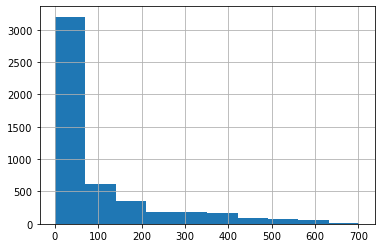

In [67]:
informational_offer_df.loc[
    (informational_offer_df['offer_type'] == 'informational') & \
    (informational_offer_df['next_offer_type'] == 'transaction')&
    (informational_offer_df['time_diff'] >=0), 
    'time_diff'].hist()

In [68]:
# Let's check the conversion if we check the transaction within 24 hours
# after the informational offer

In [69]:
time_diff_threshold = 24.0

viewed_info_num = np.sum(informational_offer_df['offer_type'] == \
                         'informational')

conversion_info_num = np.sum((informational_offer_df['offer_type'] == \
                          'informational') \
        & (informational_offer_df['next_offer_type'] == 'transaction') & \
         (informational_offer_df['time_diff'] <= time_diff_threshold))

In [70]:
print('{} users viewed the offer and {} completed it'.format(
    viewed_info_num, conversion_info_num))
print('Therefore, the conversion is {} %'.format(\
                     round(conversion_info_num/viewed_info_num*100, 2)))

8042 users viewed the offer and 3367 completed it
Therefore, the conversion is 41.87 %


Now let's create features for each offer type

In [71]:
# If the offer was viewed and it is BOGO and there was transaction, fill it 
customer_journey_df.loc[
    (customer_journey_df['time_viewed'].isnull() == False) & \
                        (customer_journey_df['offer_type'] == 'bogo'), 
    'bogo'] = 0

customer_journey_df.loc[
    (customer_journey_df['time_viewed'].isnull() == False) & \
                        (customer_journey_df['offer_type'] == 'bogo') & \
    (customer_journey_df['time_completed'].isnull() == False), 'bogo'] = 1

In [72]:
# If the offer was viewed and it is Discount and there was transaction, fill it
customer_journey_df.loc[
    (customer_journey_df['time_viewed'].isnull() == False) & \
                        (customer_journey_df['offer_type'] == 'discount'), 
    'discount'] = 0

customer_journey_df.loc[
    (customer_journey_df['time_viewed'].isnull() == False) & \
                        (customer_journey_df['offer_type'] == 'discount') & \
    (customer_journey_df['time_completed'].isnull() == False), 'discount'] = 1

Now let's work a bit on the informational offer DataFrame

In [73]:
informational_offer_df.loc[
    informational_offer_df['offer_type'] == 'informational', 'info'] = 0
informational_offer_df.loc[
    (informational_offer_df['offer_type'] == 'informational') & \
    (informational_offer_df['next_offer_type'] == 'transaction') & \
    (informational_offer_df['time_diff'] <= time_diff_threshold), 'info'] = 1

In [74]:
customer_journey_df = pd.merge(customer_journey_df,
              informational_offer_df.loc[
              informational_offer_df['info'].isnull() == False, 
              ['person', 'offer_id', 'time_viewed', 'info', 'next_time']],
              how='left', on=['person', 'offer_id', 'time_viewed'])

# Override time completed with the following time of transaction 
customer_journey_df.loc[customer_journey_df['info'] == 1, 
                        'time_completed'] = customer_journey_df['next_time']
customer_journey_df.loc[customer_journey_df['info'] == 1, 
                        'time_transaction'] = customer_journey_df['next_time']

In [75]:
customer_journey_df = customer_journey_df.drop('next_time', axis=1)

In [76]:
bogo_num = np.sum(customer_journey_df['bogo'].isnull() == False)
disc_num = np.sum(customer_journey_df['discount'].isnull() == False)
info_num = np.sum(customer_journey_df['info'].isnull() == False)

print('The current DataFrame contains: {} BOGO, {} Discount and {} \
Informational events of conversion.'.format(bogo_num, disc_num, info_num))

The current DataFrame contains: 18690 BOGO, 15761 Discount and 8042 Informational events of conversion.


Now we can work more on the features for the customers

In [77]:
customer_df = customer_journey_df[['person', 'gender', 
                   'age', 'income', 'became_member_on']].drop_duplicates()

customer_df.describe(include='all').T

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
person,14815,14815,81e9ad5fa55a4884b65e01a5db8f1b4e,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,14815,3,M,8477,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,14815,NaN,NaN,NaN,NaT,NaT,54.3931,17.3866,18,42,55,66,101
income,14815,NaN,NaN,NaN,NaT,NaT,65397.8,21598.6,30000,49000,64000,80000,120000
became_member_on,14815,1707,2017-08-19 00:00:00,39,2013-07-29,2018-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's create a feature to analyze the retention of the customers to the service.

In [78]:
def months_difference(date_start, date_end):
    ''' This function is used to calculate the difference 
    in months between two dates
    
    Args:
    date_start (timestamp/datetime) - start date of the period
    date_end (timestamp/datetime) - end date of the period
    
    Outputs:
    difference(int) - difference in months between the dates
    '''
    difference = (date_end.year - date_start.year) * 12 + \
                                        (date_end.month - date_start.month) 
    return difference

In [79]:
customer_journey_df['day'] = np.floor(
                        customer_journey_df['time_viewed'] / 24.0)

In [80]:
customer_journey_df['weekday'] = customer_journey_df['day'] % 7.0

In [81]:
customer_journey_df['became_member_from'] = customer_journey_df.apply(
            lambda x: months_difference(
                x['became_member_on'], datetime(2018, 8, 1)), 1)

In [82]:
customer_journey_df.head()

,person,offer_id,time_completed,reward,time_viewed,time_received,time_transaction,amount,time,portfolio_reward,...,gender,age,became_member_on,income,bogo,discount,info,day,weekday,became_member_from
0,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,192.0,168.0,NaN,NaN,192.0,0.0,...,M,33,2017-04-21,72000.0,NaN,NaN,0.0,8.0,1.0,16
1,0009655768c64bdeb2e877511632db8f,NaN,NaN,NaN,NaN,NaN,228.0,22.16,228.0,NaN,...,M,33,2017-04-21,72000.0,NaN,NaN,NaN,NaN,NaN,16
2,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,NaN,NaN,372.0,336.0,NaN,NaN,372.0,0.0,...,M,33,2017-04-21,72000.0,NaN,NaN,0.0,15.0,1.0,16
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,456.0,408.0,NaN,NaN,456.0,5.0,...,M,33,2017-04-21,72000.0,0.0,NaN,NaN,19.0,5.0,16
4,0009655768c64bdeb2e877511632db8f,NaN,NaN,NaN,NaN,NaN,414.0,8.57,414.0,NaN,...,M,33,2017-04-21,72000.0,NaN,NaN,NaN,NaN,NaN,16


Let's check the distribution of these values

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


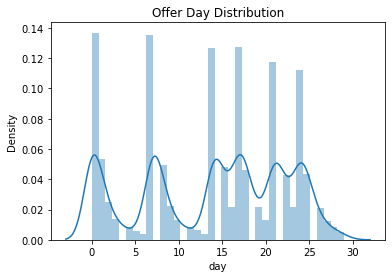

In [83]:
sns.distplot(customer_journey_df['day'].dropna())
plt.title('Offer Day Distribution')
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


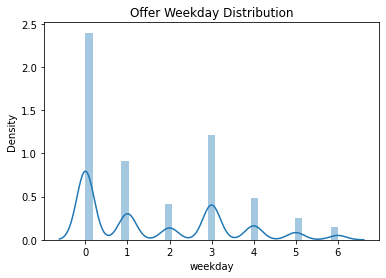

In [84]:
sns.distplot(customer_journey_df['weekday'].dropna())
plt.title('Offer Weekday Distribution')
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


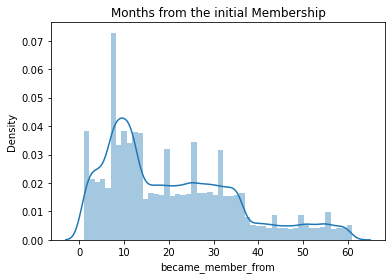

In [85]:
sns.distplot(customer_journey_df['became_member_from'].dropna())
plt.title('Months from the initial Membership')
plt.show()

In order to analyze the data correctly, it is important to look at the data in the past. I propose to create new features to analyze the particular clients' behavior:
- Particular Transactions
- Average number of Transactions per client
- Number of rewards sent
- Number of offers, which were completed or viewed
- The time from offer receival to completion or view

In [86]:
# Check whether there was a transaction
customer_journey_df['transaction'] = 0
customer_journey_df.loc[
    customer_journey_df['time_transaction'].isnull() == False,
    'transaction'] = 1

# Check whether the offer was completed
customer_journey_df['completed'] = 0
customer_journey_df.loc[
    customer_journey_df['time_completed'].isnull() == False,
    'completed'] = 1

In [87]:
# Create new features
customer_journey_df['number_of_offers_viewed'] = 0
customer_journey_df['number_of_offers_completed'] = 0
customer_journey_df['receival_to_view_avg'] = 0
customer_journey_df['view_to_completion_avg'] = 0

customer_journey_df['number_of_transactions'] = 0
customer_journey_df['avg_number_of_transctions'] = 0
customer_journey_df['avg_reward'] = 0

customer_journey_df['receival_to_view'] = \
    customer_journey_df['time_viewed'] - customer_journey_df['time_received']

customer_journey_df['time_from_view_to_completion'] = \
    customer_journey_df['time_completed'] - customer_journey_df['time_viewed']


In [97]:
# Check if the same person is between the transactions
customer_journey_df['prev_person'] = customer_journey_df['person'].shift(1)

In [98]:
# Fill the features via loop
for i, row in customer_journey_df.iterrows():
    # Check the progress
    print(str(i)+' / '+str(len(customer_journey_df)), end='\r')
    
    # We fill the features if rows are attributed to the same person
    if row['person'] == row['prev_person']:
        
        # If the previous offer was viewed
        customer_journey_df.loc[i, 'number_of_offers_viewed'] = \
            customer_journey_df.loc[i-1, 'number_of_offers_viewed'] + \
                (0 if customer_journey_df.loc[i-1, 'offer_type'] == \
                                             'transaction' else 1)
        
        # If the previous offer was completed
        customer_journey_df.loc[i, 'number_of_offers_completed'] = \
            customer_journey_df.loc[i-1, 'number_of_offers_completed'] + \
                                customer_journey_df.loc[i-1, 'completed']
        
        # Previous time from Receival to View
        customer_journey_df.loc[i, 'receival_to_view_avg'] = \
            np.nansum((customer_journey_df.loc[i-1, \
               'receival_to_view_avg'], 
                       customer_journey_df.loc[i-1, 'receival_to_view_avg']))
        
        # Previous time from View to Completion
        customer_journey_df.loc[i, 'view_to_completion_avg'] = \
            np.nansum((customer_journey_df.loc[i-1, 
               'view_to_completion_avg'], 
                   customer_journey_df.loc[i-1, 
                       'time_from_view_to_completion']))
        
        # If the previous row was a Transaction
        customer_journey_df.loc[i, 'number_of_transactions'] = \
            customer_journey_df.loc[i-1, 'number_of_transactions'] + \
                customer_journey_df.loc[i-1, 'transaction']
        
        # If the previous row was a Transaction, add amount
        customer_journey_df.loc[i, 'avg_number_of_transctions'] = \
            customer_journey_df.loc[i-1, 'avg_number_of_transctions'] + \
                (0 if customer_journey_df.loc[i-1, 'transaction'] == \
                     0 else customer_journey_df.loc[i-1, 'amount'])
        
        # If the previous row was a Reward, add reward
        customer_journey_df.loc[i, 'avg_reward'] = \
            np.nansum((customer_journey_df.loc[i-1, 'avg_reward'], 
               customer_journey_df.loc[i-1, 'reward']))

In [99]:
# Get the average values
customer_journey_df['receival_to_view_avg'] = \
    customer_journey_df['receival_to_view_avg'] / \
        customer_journey_df['number_of_offers_viewed']

customer_journey_df['view_to_completion_avg'] = \
    customer_journey_df['view_to_completion_avg'] / \
        customer_journey_df['number_of_offers_completed']

customer_journey_df['avg_number_of_transctions'] = \
    customer_journey_df['avg_number_of_transctions'] / \
        customer_journey_df['number_of_transactions']

customer_journey_df['receival_to_view_avg'].fillna(0, inplace=True)

customer_journey_df['view_to_completion_avg'].fillna(0, inplace=True)

customer_journey_df['avg_number_of_transctions'].fillna(0, inplace=True)

In [100]:
customer_journey_df.tail()

,person,offer_id,time_completed,reward,time_viewed,time_received,time_transaction,amount,time,portfolio_reward,...,number_of_offers_viewed,number_of_offers_completed,receival_to_view_avg,view_to_completion_avg,number_of_transactions,avg_number_of_transctions,avg_reward,receival_to_view,time_from_view_to_completion,prev_person
143838,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,534.0,504.0,NaN,NaN,534.0,5.0,...,2,2,0.0,39.0,9,15.766667,7.0,30.0,NaN,ffff82501cea40309d5fdd7edcca4a07
143839,ffff82501cea40309d5fdd7edcca4a07,NaN,NaN,NaN,NaN,NaN,504.0,7.79,504.0,NaN,...,3,2,0.0,39.0,9,15.766667,7.0,NaN,NaN,ffff82501cea40309d5fdd7edcca4a07
143840,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,384.0,2.0,354.0,576.0,384.0,15.57,354.0,2.0,...,3,2,0.0,39.0,10,14.969000,7.0,-222.0,30.0,ffff82501cea40309d5fdd7edcca4a07
143841,ffff82501cea40309d5fdd7edcca4a07,NaN,NaN,NaN,NaN,NaN,606.0,10.12,606.0,NaN,...,4,3,0.0,36.0,11,15.023636,9.0,NaN,NaN,ffff82501cea40309d5fdd7edcca4a07
143842,ffff82501cea40309d5fdd7edcca4a07,NaN,NaN,NaN,NaN,NaN,648.0,18.91,648.0,NaN,...,4,3,0.0,36.0,12,14.615000,9.0,NaN,NaN,ffff82501cea40309d5fdd7edcca4a07


In [101]:
# Save the data to CSV to upload it after to the Sagemaker
customer_journey_df.to_csv('customer_journey_updated.csv')

Now let's upload the data to Sagemaker

In [102]:
import boto3
import sagemaker
from sagemaker import get_execution_role

session = sagemaker.Session()
role = get_execution_role()

In [107]:
variables = ['gender', 'weekday', 'age', 'income', 'day','became_member_from', 
             'number_of_transactions', 'avg_number_of_transctions',
             'number_of_offers_completed', 'number_of_offers_viewed', 
             'avg_reward', 'receival_to_view_avg', 'view_to_completion_avg']

In [111]:
# Create dictionary for each type of offer
df_target = {}
prefix = 'CapstoneProjectStarbucks'
data_location_dict = {}

for tgt in ['bogo', 'discount', 'info']:
    df_target[tgt] = customer_journey_df.loc[
        customer_journey_df[tgt].isnull() == False, [tgt] + variables]
    
    df_target[tgt].to_csv(f'./data/{tgt}.csv', index=False, header=False)
    
    data_location_dict[tgt] = \
                session.upload_data(f'./data/{tgt}.csv', key_prefix=prefix)

In [113]:
# Check the location
data_location_dict

{'bogo': 's3://sagemaker-us-east-1-847508660735/CapstoneProjectStarbucks/bogo.csv',
 'discount': 's3://sagemaker-us-east-1-847508660735/CapstoneProjectStarbucks/discount.csv',
 'info': 's3://sagemaker-us-east-1-847508660735/CapstoneProjectStarbucks/info.csv'}

In [114]:
# Read the data to check
df_target = {}
for tgt in ['bogo', 'discount', 'info']:
    df_target[tgt] = pd.read_csv(f'./data/{tgt}.csv', 
                                 header=None, names=[tgt] + variables)

Now we are ready to compare the current analysis of features versus the baseline values. In order to do this, we have to introduce couple of new functions to analyze the charts.

In [115]:
def analyse_categorical_vars(df, feature_name, threshold=0.01, 
             target_name='tgt', plot_title=None, target_mean_color='black'):
    '''
    Function charts the mean Target value versus a categorical
    variable.
    
    Args:
    df (DataFrame) - input data
    feature_name (str) - feature to analyze versus the target.
    threshold(float) - categories with frequency between threshold are
                        labeled as Other
    target_name (str) - name of the target variable
    plot_title (str) - plot title
    target_mean_color (str) - color for the average target value

    Outputs:
    chart (matplotlib) - chart plotting the analyzed variable versus target
    '''

    # Select only used features
    df_copy = df[[feature_name, target_name]].copy()
    df_copy[feature_name] = df_copy[feature_name].fillna('NULL')
    
    # Replace categories with distribution less than threshold with Other
    df_temp = df_copy[feature_name].value_counts(1)
    others_list = df_temp[df_temp < threshold].index.tolist()
    
    if len(others_list) > 1:
        df_copy[feature_name] = \
                df_analysis[feature_name].replace(others_list, 'Other')

    # Compute the target mean
    target_mean = df_copy[target_name].mean()

    plt.title(plot_title)
        
    plt.xticks(rotation='vertical')
    
    df_barplot = df_copy.groupby(feature_name).agg(
                                    {target_name: 'mean'}).reset_index()
    
    plot = sns.barplot(x = feature_name, y = target_name, 
                       data = df_barplot, ci = None)
    
    plot.axhline(target_mean, ls = '--', color = target_mean_color)

In [126]:
def analyse_numerical_vars(df, feature_name, q=(0, 0.25, 0.5, 0.75, 1), 
       target_name='tgt', plot_title=None, target_mean_color='black'):
    
    '''
    Function charts the mean Target value versus a numerical 
    variable and the list of its quantiles.
    
   Args:
    df (DataFrame) - input data
    feature_name (str) - feature to analyze versus the target.
    q (tuple of floats) - quantiles for bucketing the values
    target_name (str) - name of the target variable
    plot_title (str) - plot title
    target_mean_color (str) - color for the average target value

    Outputs:
    chart (matplotlib) - chart plotting the analyzed variable versus target
    '''
    
    # Compute the overall target mean
    target_mean = df[target_name].mean()

    plt.title(plot_title)
        
    plt.xticks(rotation='vertical')
    
    df_temp = df[[feature_name, target_name]].copy()
    cuts = np.quantile(df[feature_name].dropna(), q)
    
    df_temp['agg'] = pd.cut(df_temp[feature_name], bins=cuts, 
                     duplicates='drop', include_lowest=True).astype(str)
    df_agg = df_temp.groupby('agg').agg({target_name: 'mean'}).reset_index()
    df_agg['ord'] = df_agg['agg'].apply(
        lambda x: float(x[1:].split(',')[0]) if x != 'nan' else np.nan)
    df_agg.sort_values('ord', inplace=True)
    
    plot = sns.barplot(x='agg', y=target_name, data=df_agg, ci=None)
    plot.set_xlabel(feature_name)
    plot.axhline(target_mean, ls='--', color=target_mean_color)

Now let's plot all the values compared with the target ones

In [127]:
def analyse_var(df_target, feature):
    '''
    This function creates a chart for all required variables for all
    types of offers.
    
    Args:
    df_target (dict) - dictionary with DataFrames with input data
    feature (str) - the required feature to plot the charts
    
    Outputs:
    chart (matplotlib) - chart comparing the analyzed features
    versus target for each offer type
    '''
    
    plt.subplots(1, 3, figsize=(15, 5))
    
    if df_target['bogo'][feature].dtype == 'O' or feature == 'weekday':
        func = analyse_categorical_vars
    else:
        func = analyse_numerical_vars
        
    plt.suptitle(feature, fontsize=20)
    
    plt.subplot(131)
    func(df_target['bogo'], feature, target_name='bogo', 
                         plot_title='Bogo')
    
    plt.subplot(132)
    func(df_target['discount'], feature, target_name='discount', 
                            plot_title='Discount')
    
    plt.subplot(133)
    func(df_target['info'], feature, target_name='info', 
                             plot_title='Informational')
        
    plt.show()
    print('\n')

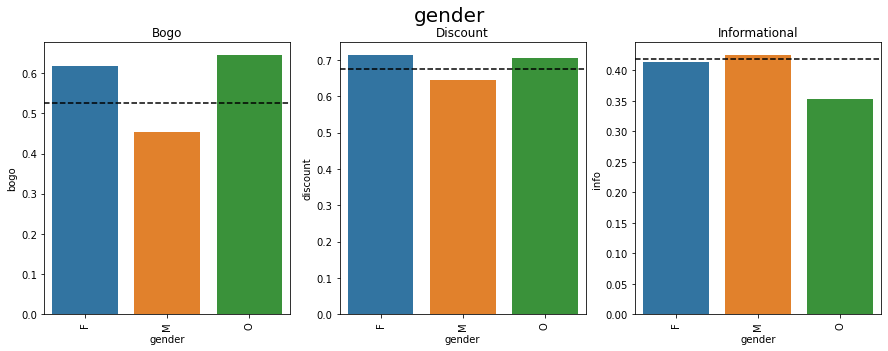

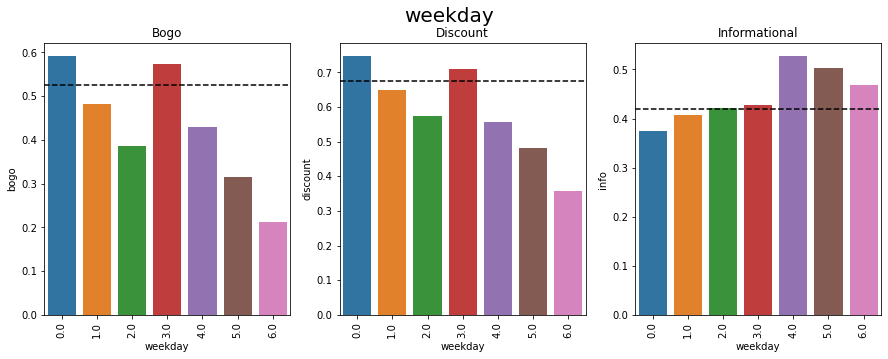

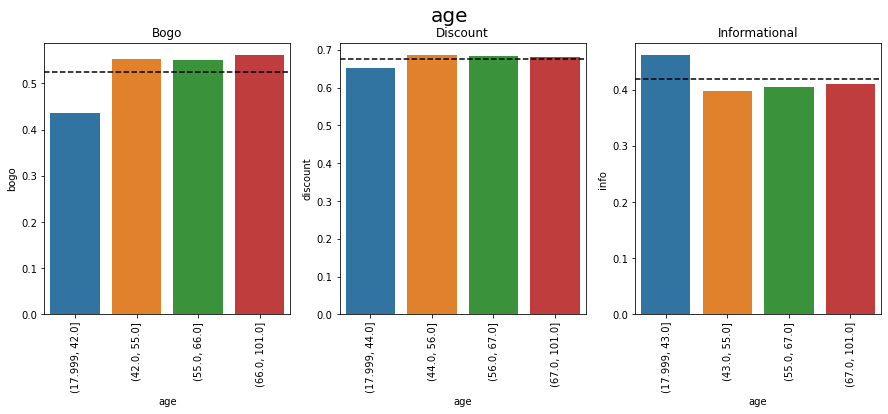

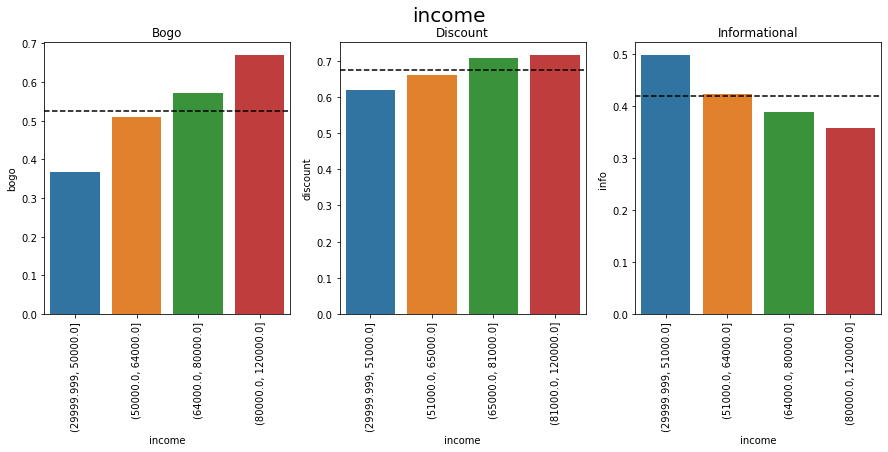

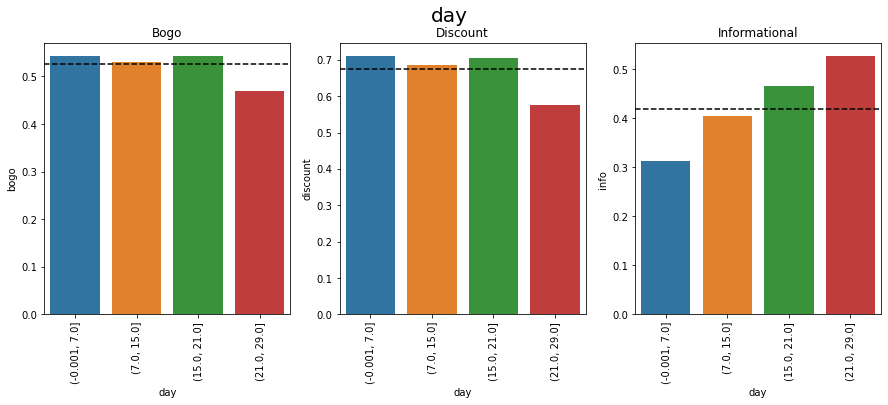

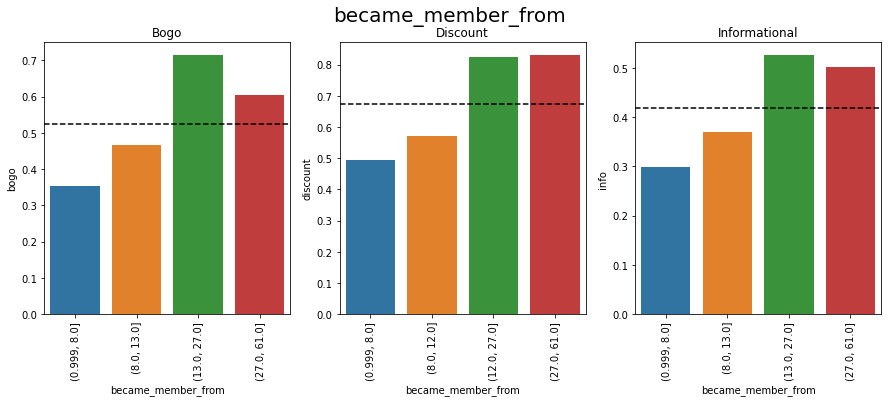

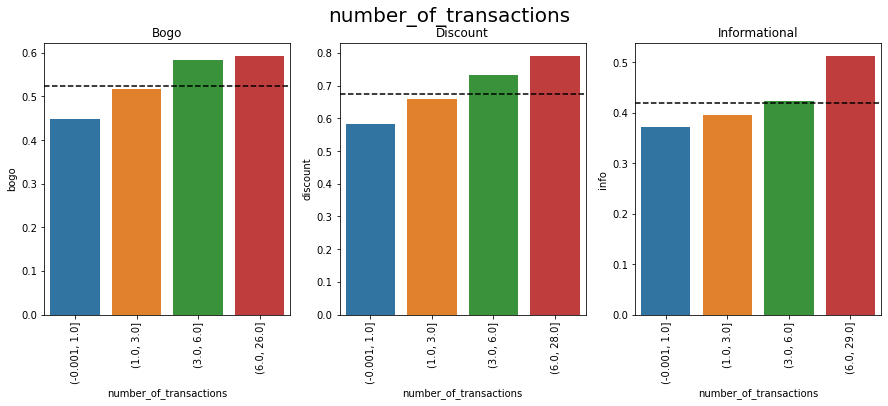

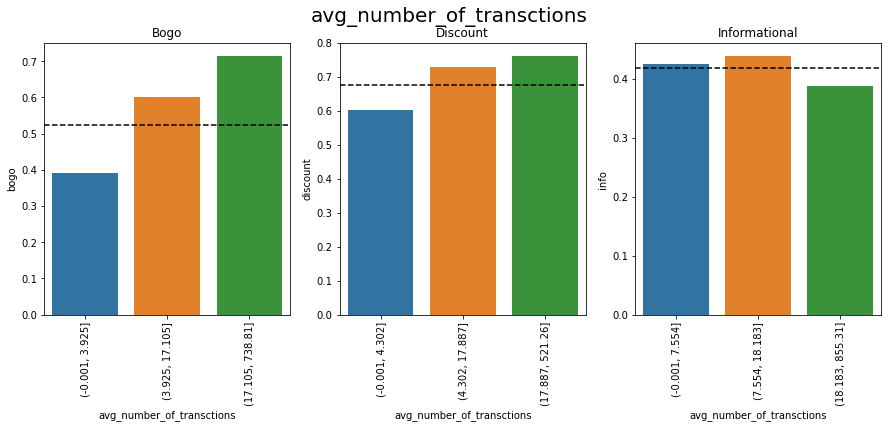

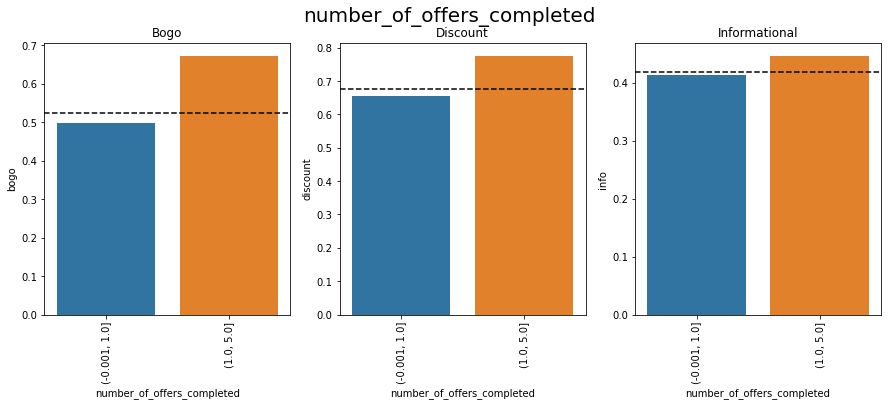

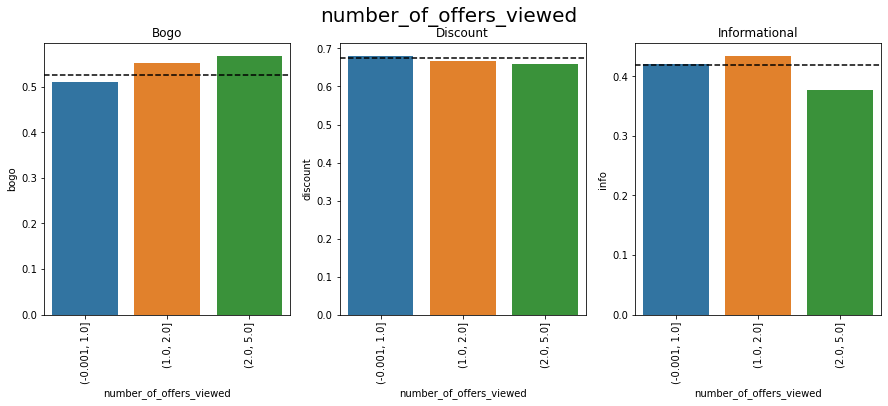

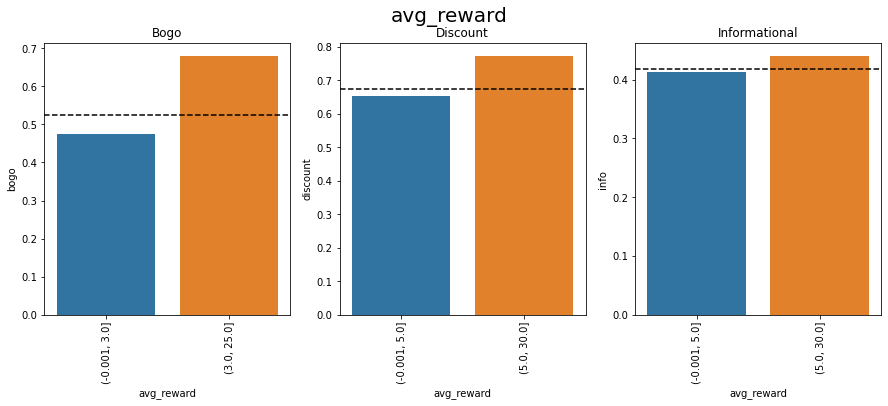

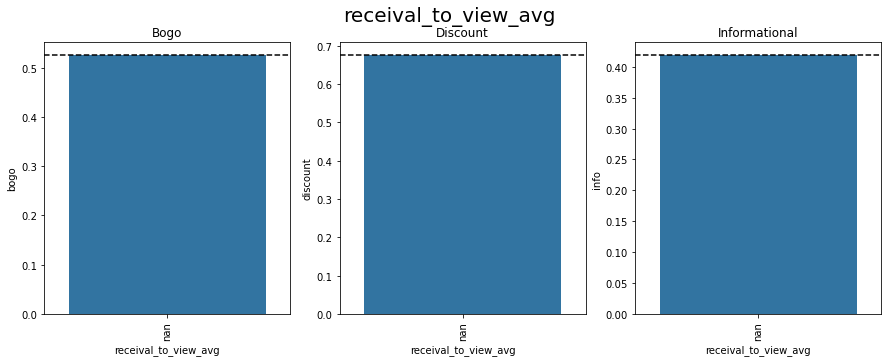

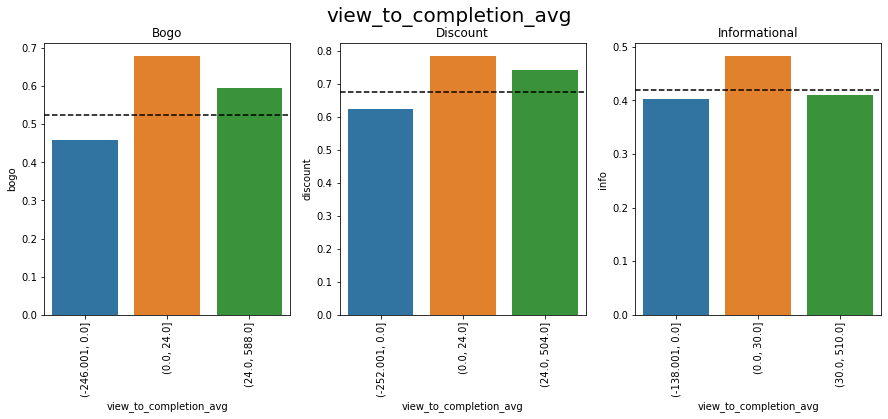

In [128]:
for feature in variables:
    analyse_var(df_target, feature)